In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import matplotlib.cm as cm

import warnings
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'seaborn'

In [ ]:
conn = sqlite3.connect("travel.sqlite")
cursor = conn.cursor()


cursor.execute("""select name from sqlite_master where type ='table';""")
print('List of tables present in the database')
table_list = [table[0] for table in cursor.fetchall()]
table_list

List of tables present in the database


['aircrafts_data',
 'airports_data',
 'boarding_passes',
 'bookings',
 'flights',
 'seats',
 'ticket_flights',
 'tickets']

In [ ]:
tables = pd.read_sql("""SELECT *
                        FROM sqlite_master
                        WHERE type='table';""", conn)
tables

,type,name,tbl_name,rootpage,sql
0,table,aircrafts_data,aircrafts_data,2,CREATE TABLE aircrafts_data (\r\n aircraft_...
1,table,airports_data,airports_data,3,CREATE TABLE airports_data (\r\n airport_co...
2,table,boarding_passes,boarding_passes,4,CREATE TABLE boarding_passes (\r\n ticket_n...
3,table,bookings,bookings,5,CREATE TABLE bookings (\r\n book_ref charac...
4,table,flights,flights,6,CREATE TABLE flights (\r\n flight_id intege...
5,table,seats,seats,7,CREATE TABLE seats (\r\n aircraft_code char...
6,table,ticket_flights,ticket_flights,8,CREATE TABLE ticket_flights (\r\n ticket_no...
7,table,tickets,tickets,9,CREATE TABLE tickets (\r\n ticket_no charac...


,aircraft_code,model,range
0,773,Boeing 777-300,11100
1,763,Boeing 767-300,7900
2,SU9,Sukhoi Superjet-100,3000
3,320,Airbus A320-200,5700
4,321,Airbus A321-200,5600
5,319,Airbus A319-100,6700
6,733,Boeing 737-300,4200
7,CN1,Cessna 208 Caravan,1200
8,CR2,Bombardier CRJ-200,2700


In [ ]:
# creating a function to help retrieve and store the tables into a pandas dataframe
def tables(table_name, conn):
    # iterating over each available table in the list
    for table in table_name:
        # storing the table into a dataframe by reading them using the read_sql_query
        df = pd.read_sql_query(f"""select * from {table}""", conn)
        # introducing a global variable
        globals()[table] = df
    return dict

table_names = ['aircrafts_data','boarding_passes','bookings','flights','seats','ticket_flights','tickets']
tables(table_names, conn)

dict

In [ ]:
aircrafts_data

,aircraft_code,model,range
0,773,Boeing 777-300,11100
1,763,Boeing 767-300,7900
2,SU9,Sukhoi Superjet-100,3000
3,320,Airbus A320-200,5700
4,321,Airbus A321-200,5600
5,319,Airbus A319-100,6700
6,733,Boeing 737-300,4200
7,CN1,Cessna 208 Caravan,1200
8,CR2,Bombardier CRJ-200,2700


In [ ]:
boarding_passes

,ticket_no,flight_id,boarding_no,seat_no
0,0005435212351,30625,1,2D
1,0005435212386,30625,2,3G
2,0005435212381,30625,3,4H
3,0005432211370,30625,4,5D
4,0005435212357,30625,5,11A
...,...,...,...,...
579681,0005434302871,19945,85,20F
579682,0005432892791,19945,86,21C
579683,0005434302869,19945,87,20E
579684,0005432802476,19945,88,21F


In [ ]:
airports_data = pd.read_sql_query("select * from airports_data", conn)
airports_data['airport_name'] = airports_data['airport_name'].apply(lambda x: json.loads(x)['en'])
airports_data['city'] = airports_data['city'].apply(lambda x: json.loads(x)['en'])
airports_data

,airport_code,airport_name,city,coordinates,timezone
0,YKS,Yakutsk Airport,Yakutsk,"(129.77099609375,62.0932998657226562)",Asia/Yakutsk
1,MJZ,Mirny Airport,Mirnyj,"(114.03900146484375,62.534698486328125)",Asia/Yakutsk
2,KHV,Khabarovsk-Novy Airport,Khabarovsk,"(135.18800354004,48.5279998779300001)",Asia/Vladivostok
3,PKC,Yelizovo Airport,Petropavlovsk,"(158.453994750976562,53.1679000854492188)",Asia/Kamchatka
4,UUS,Yuzhno-Sakhalinsk Airport,Yuzhno-Sakhalinsk,"(142.718002319335938,46.8886985778808594)",Asia/Sakhalin
...,...,...,...,...,...
99,MMK,Murmansk Airport,Murmansk,"(32.7508010864257812,68.7817001342773438)",Europe/Moscow
100,ABA,Abakan Airport,Abakan,"(91.3850021362304688,53.7400016784667969)",Asia/Krasnoyarsk
101,BAX,Barnaul Airport,Barnaul,"(83.5384979248046875,53.363800048828125)",Asia/Krasnoyarsk
102,AAQ,Anapa Vityazevo Airport,Anapa,"(37.3473014831539984,45.002101898192997)",Europe/Moscow


In [ ]:
seats

,aircraft_code,seat_no,fare_conditions
0,319,2A,Business
1,319,2C,Business
2,319,2D,Business
3,319,2F,Business
4,319,3A,Business
...,...,...,...
1334,773,48H,Economy
1335,773,48K,Economy
1336,773,49A,Economy
1337,773,49C,Economy


In [ ]:
ticket_flights

,ticket_no,flight_id,fare_conditions,amount
0,0005432159776,30625,Business,42100
1,0005435212351,30625,Business,42100
2,0005435212386,30625,Business,42100
3,0005435212381,30625,Business,42100
4,0005432211370,30625,Business,42100
...,...,...,...,...
1045721,0005435097522,32094,Economy,5200
1045722,0005435097521,32094,Economy,5200
1045723,0005435104384,32094,Economy,5200
1045724,0005435104352,32094,Economy,5200


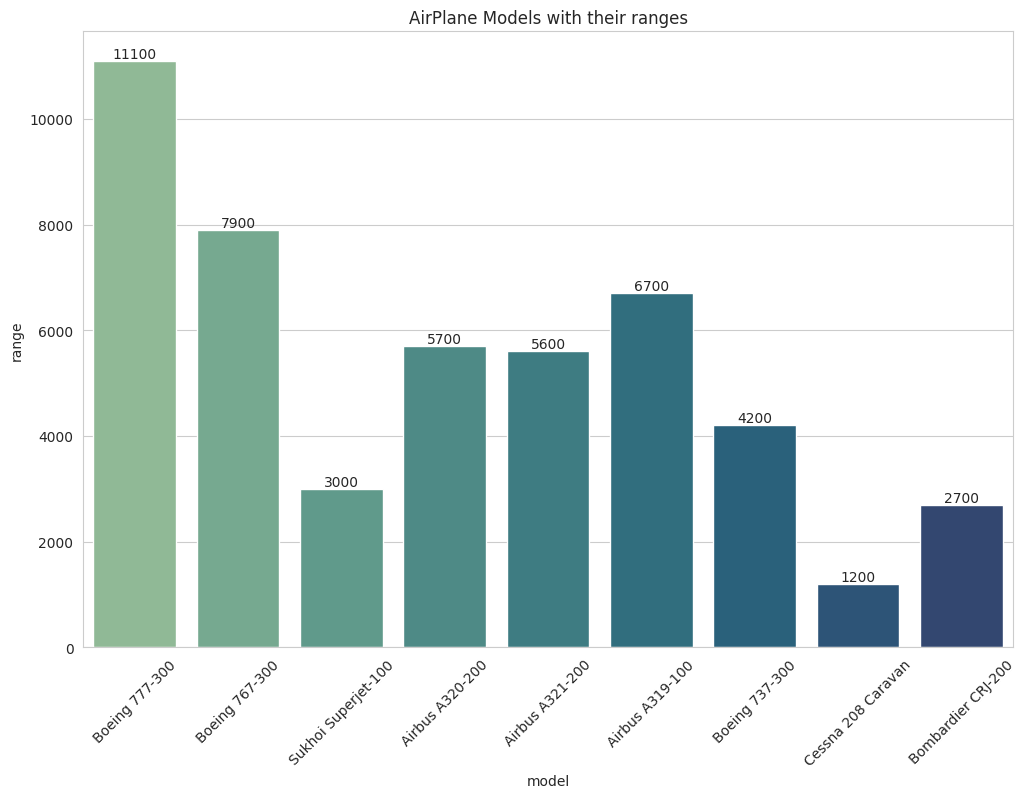

In [ ]:

# 'range' column would contain numerical values representing the range (in kilometers or miles) of each airplane model.
sns.set_style('whitegrid')
fig,axes = plt.subplots(figsize=(12,8))
ax = sns.barplot(x='model',y='range', data=aircrafts_data,palette='crest', color='purple')
for container in ax.containers:
    ax.bar_label(container)
plt.title('AirPlane Models with their ranges')
plt.xticks(rotation=45)
plt.show()
# print(" We can visually compare the ranges of different airplane models. It allows us to identify which airplane models have the longest and shortest ranges.")

In [ ]:
df = pd.read_sql_query("""select aircraft_code, count(*) as num_seats from seats
                        group by aircraft_code having num_seats >100""", conn)

df.to_csv('aircraft_seats.csv')

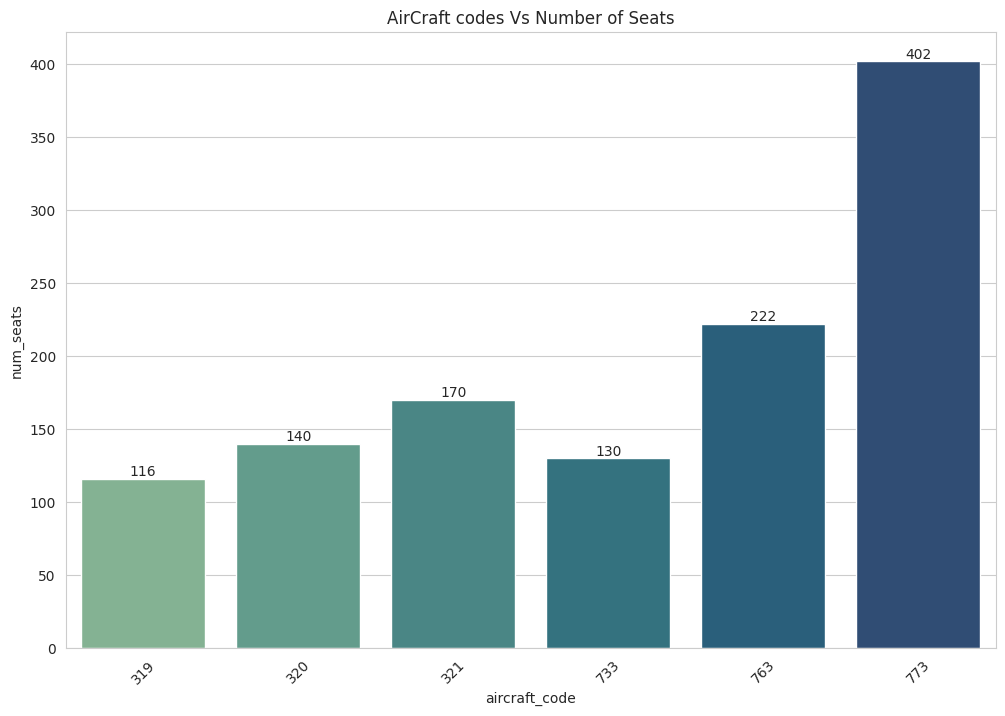

In [ ]:


sns.set_style('whitegrid')
fig,axes = plt.subplots(figsize=(12,8))
ax = sns.barplot(x='aircraft_code',y='num_seats', data=df, palette = 'crest')
for container in ax.containers:
    ax.bar_label(container)
plt.title('AirCraft codes Vs Number of Seats')
plt.xticks(rotation=45)
plt.show()



In [ ]:
crafts = pd.read_sql("""SELECT aircraft_code, model
                        FROM aircrafts_data
                        where aircraft_code IN (319, 320, 321, 733, 763, 773);""", conn)
crafts


,aircraft_code,model
0,773,"{""en"": ""Boeing 777-300"", ""ru"": ""Боинг 777-300""}"
1,763,"{""en"": ""Boeing 767-300"", ""ru"": ""Боинг 767-300""}"
2,320,"{""en"": ""Airbus A320-200"", ""ru"": ""Аэробус A320-..."
3,321,"{""en"": ""Airbus A321-200"", ""ru"": ""Аэробус A321-..."
4,319,"{""en"": ""Airbus A319-100"", ""ru"": ""Аэробус A319-..."
5,733,"{""en"": ""Boeing 737-300"", ""ru"": ""Боинг 737-300""}"



Observation¶

    Here we successfully derived the names of airplanes using their codes
    So it seems like " Boeing 777-300 " is having maximum number of seats (402).



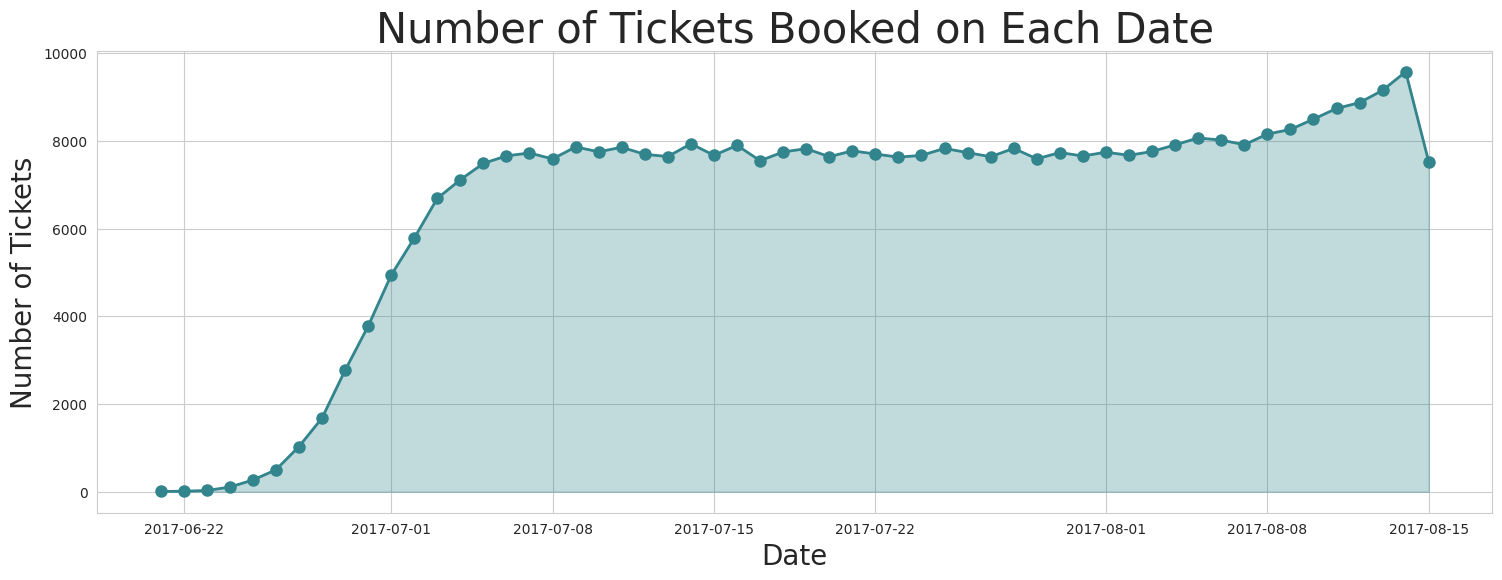

In [ ]:

# Number of tickets booked and total amount earned changed with the time¶
tickets = pd.read_sql_query("""select * from tickets inner join bookings
                    on tickets.book_ref = bookings.book_ref""", conn)

tickets['book_date'] = pd.to_datetime(tickets['book_date'])
tickets['date'] = tickets['book_date'].dt.date
tickets_count = tickets.groupby('date')[['date']].count()
plt.figure(figsize=(18,6))
plt.fill_between(tickets_count.index, tickets_count['date'], color=cm.get_cmap('crest')(0.5), alpha=0.3)
plt.plot(tickets_count.index, tickets_count['date'], color=cm.get_cmap('crest')(0.5), linewidth=2, marker='o', markersize=8)
plt.title('Number of Tickets Booked on Each Date', fontsize=30)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Number of Tickets', fontsize=20)
plt.grid('b')
plt.show()



Observation

    Utilized a line chart visualization to analyze the trend of ticket bookings and revenue earned.
    The number of tickets booked showed a gradual increase from June 22nd to July 7th.
    From July 8th until August, ticket bookings remained relatively stable with a noticeable peak in bookings on a single day.
    The revenue earned by the company is closely correlated with the number of tickets booked.
    The total revenue earned followed a similar trend throughout the analyzed time period.
    Further exploration of the factors contributing to the peak in ticket bookings could help increase overall revenue and optimize operational strategies.



In [ ]:
from gtts import gTTS
from IPython.display import Audio

# Observation text
observation_text = """
Utilized a line chart visualization to analyze the trend of ticket bookings and revenue earned.
The number of tickets booked showed a gradual increase from June 22nd to July 7th.
From July 8th until August, ticket bookings remained relatively stable with a noticeable peak in bookings on a single day.
The revenue earned by the company is closely correlated with the number of tickets booked.
The total revenue earned followed a similar trend throughout the analyzed time period.
Further exploration of the factors contributing to the peak in ticket bookings could help increase overall revenue and optimize operational strategies.
"""
# Initialize gTTS with the observation text
tts = gTTS(text=observation_text, lang='en')

# Save the audio content to a file
tts.save("observation.mp3")

# Play the audio file
Audio("observation.mp3", autoplay=True)

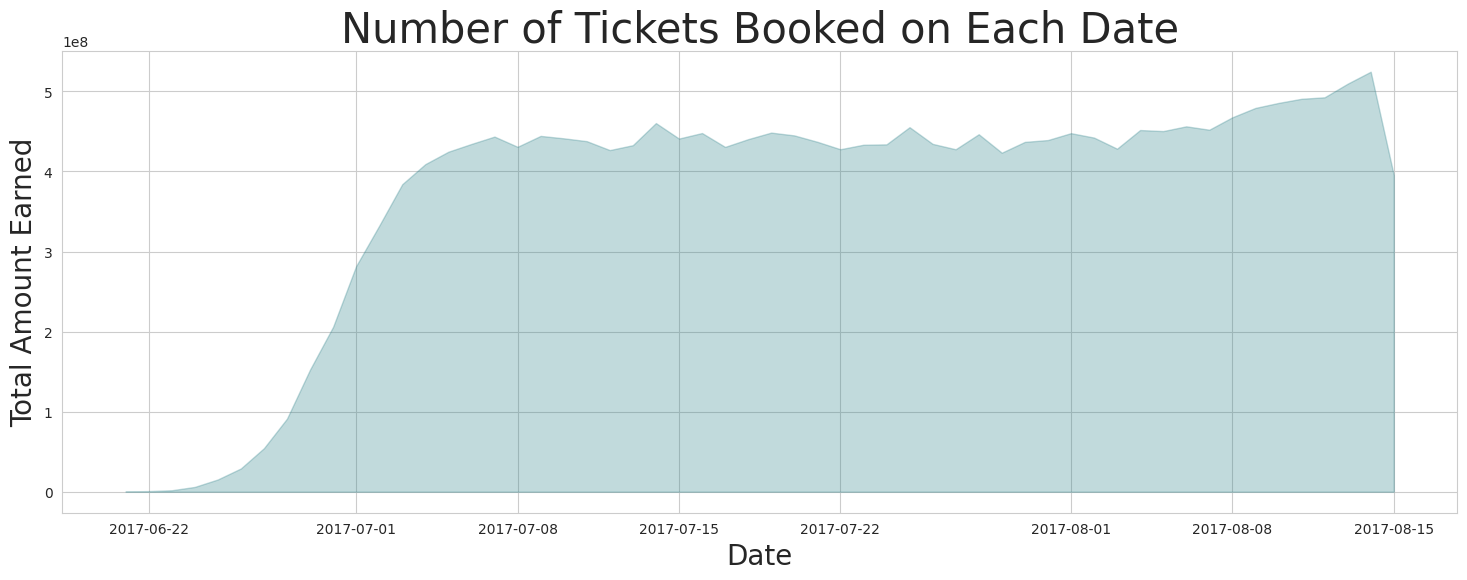

In [ ]:
bookings = pd.read_sql_query("select * from bookings", conn)

bookings['book_date'] = pd.to_datetime(bookings['book_date'])
bookings['date'] = bookings['book_date'].dt.date
booking_amount = bookings.groupby('date')[['total_amount']].sum()

plt.figure(figsize=(18,6))
plt.fill_between(booking_amount.index, booking_amount['total_amount'],color=cm.get_cmap('crest')(0.5), alpha=0.3)
plt.title('Number of Tickets Booked on Each Date', fontsize=30)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Total Amount Earned', fontsize=20)
plt.grid('b')
plt.show()

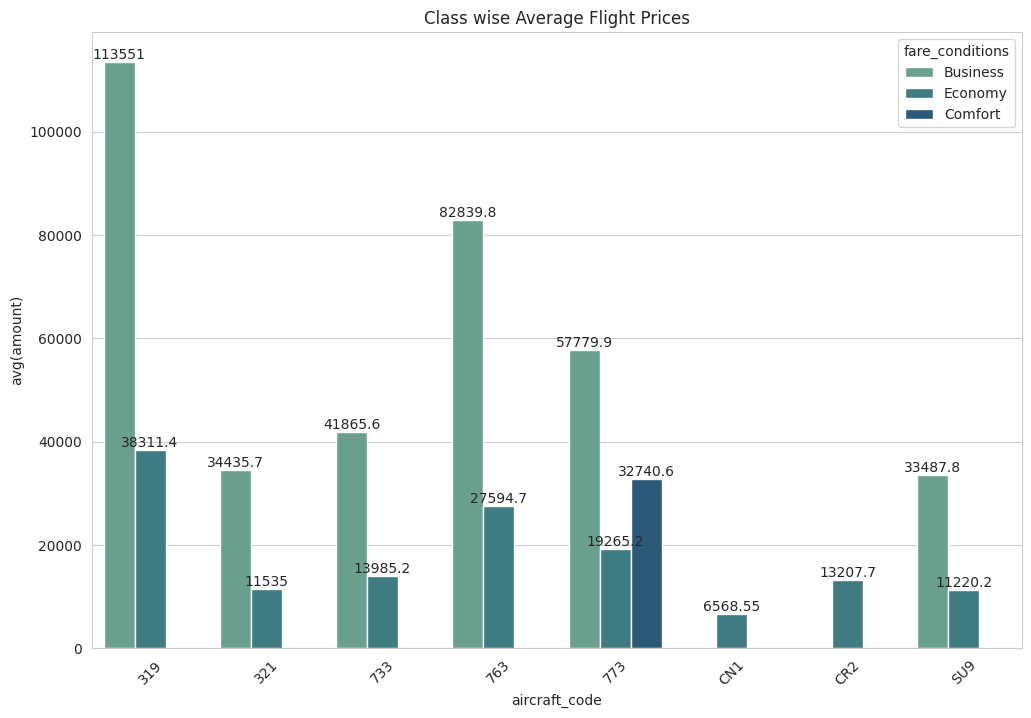

In [ ]:
df = pd.read_sql_query("""select fare_conditions, aircraft_code,avg(amount)
                        from ticket_flights join flights
                        on ticket_flights.flight_id = flights.flight_id
                        group by aircraft_code, fare_conditions""", conn)
df.to_csv('fare_avg_amount.csv')

sns.set_style('whitegrid')
fig,axes = plt.subplots(figsize=(12,8))
ax = sns.barplot(x='aircraft_code',y='avg(amount)',hue='fare_conditions', data=df, palette = 'crest')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Class wise Average Flight Prices')
plt.xticks(rotation=45)
plt.show()

    Airlines can use this analysis to optimize pricing strategies for different fare conditions and aircraft codes.
    Pricing adjustments can be made to capitalize on demand for specific fare conditions on different aircraft types.
    Further investigation into the factors influencing average prices for each fare condition on different aircraft codes can provide insights for targeted marketing and revenue management strategies.

Overall, this analysis provides valuable insights into the average flight prices across different fare conditions and aircraft codes, enabling airlines to make data-driven decisions to maximize revenue and customer satisfaction.


In [ ]:
crafts = pd.read_sql("""SELECT aircraft_code, model
                        FROM aircrafts_data
                        where aircraft_code IN (319, 321, 733, 763, 773, 'CN1', 'CR2', 'SU9');""", conn)
crafts


,aircraft_code,model
0,773,"{""en"": ""Boeing 777-300"", ""ru"": ""Боинг 777-300""}"
1,763,"{""en"": ""Boeing 767-300"", ""ru"": ""Боинг 767-300""}"
2,SU9,"{""en"": ""Sukhoi Superjet-100"", ""ru"": ""Сухой Суп..."
3,321,"{""en"": ""Airbus A321-200"", ""ru"": ""Аэробус A321-..."
4,319,"{""en"": ""Airbus A319-100"", ""ru"": ""Аэробус A319-..."
5,733,"{""en"": ""Boeing 737-300"", ""ru"": ""Боинг 737-300""}"
6,CN1,"{""en"": ""Cessna 208 Caravan"", ""ru"": ""Сессна 208..."
7,CR2,"{""en"": ""Bombardier CRJ-200"", ""ru"": ""Бомбардье ..."


<Axes: xlabel='aircraft_code', ylabel='model'>

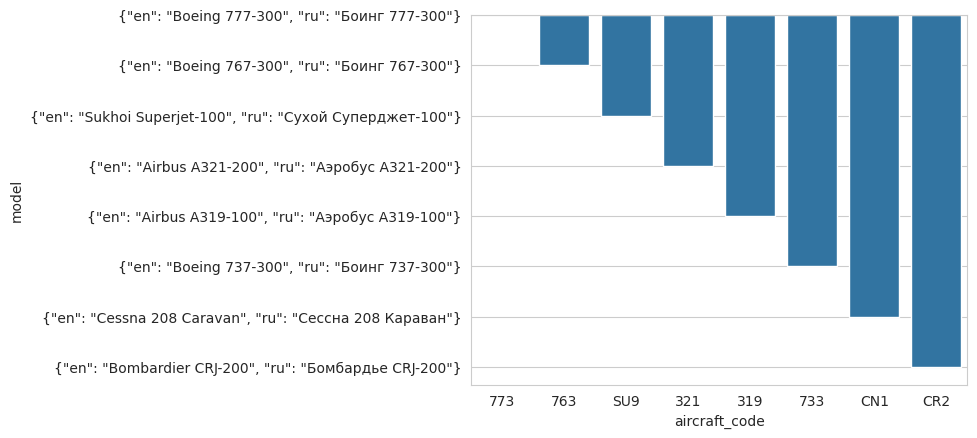

In [ ]:
# @title Number of crafts by aircraft code

sns.barplot(x = 'aircraft_code', y = 'model', data = crafts)


Observation

    Here we successfully derived the names of airplanes using their codes
    So it seems like " Airbus A319-100 " is having maximum average number of Business class seats.
    Also " Airbus A319-100 " is having maximum average number of Economy seats.
    And " Boeing 777-300 " is having maximum number of Comfort seats.



In [ ]:
revenue = pd.read_sql_query("""select aircraft_code,ticket_count,total_revenue,total_revenue/ticket_count as avg_revenue_per_ticket from
                    (select aircraft_code, count(*) as ticket_count, sum(amount) as total_revenue from ticket_flights
                        join flights on ticket_flights.flight_id = flights.flight_id
                        group by aircraft_code)""", conn)
revenue.to_csv('revenue.csv')


In [ ]:
occupancy_rate = pd.read_sql_query("""select a.aircraft_code,avg(a.seats_count) as booked_seats, b.num_seats, avg(a.seats_count)/b.num_seats as occupancy_rate from
                (select aircraft_code,flights.flight_id,count(*) as seats_count from boarding_passes
                    inner join flights
                    on boarding_passes.flight_id = flights.flight_id
                    group by aircraft_code,flights.flight_id) as a
                    inner join
                    (select aircraft_code,count(*) as num_seats from seats
                    group by aircraft_code) as b
                    on a.aircraft_code = b.aircraft_code group by a.aircraft_code""", conn
                  )
occupancy_rate


,aircraft_code,booked_seats,num_seats,occupancy_rate
0,319,53.583181,116,0.461924
1,321,88.809231,170,0.522407
2,733,80.255462,130,0.617350
3,763,113.937294,222,0.513231
4,773,264.925806,402,0.659019
5,CN1,6.004431,12,0.500369
6,CR2,21.482847,50,0.429657
7,SU9,56.812113,97,0.585692


<Axes: xlabel='booked_seats', ylabel='occupancy_rate'>

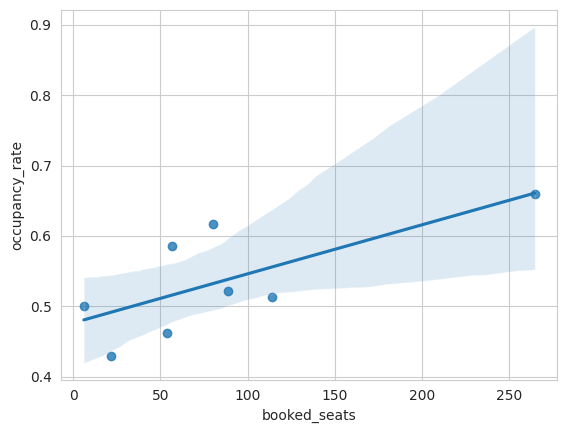

In [ ]:
# @title Correlation between Booked Seats and Occupancy Rate

sns.regplot(x="booked_seats", y="occupancy_rate", data=occupancy_rate)

In [ ]:
occupancy_rate['inc occupancy rate'] = occupancy_rate['occupancy_rate']+occupancy_rate['occupancy_rate']*0.1
occupancy_rate


,aircraft_code,booked_seats,num_seats,occupancy_rate,inc occupancy rate
0,319,53.58318098720292,116,0.46192397402761143,0.5081163714303726
1,321,88.80923076923077,170,0.5224072398190045,0.574647963800905
2,733,80.25546218487395,130,0.617349709114415,0.6790846800258565
3,763,113.93729372937294,222,0.5132310528350132,0.5645541581185146
4,773,264.9258064516129,402,0.659019419033863,0.7249213609372492
5,CN1,6.004431314623338,12,0.5003692762186115,0.5504062038404727
6,CR2,21.48284690220174,50,0.42965693804403476,0.4726226318484382
7,SU9,56.81211267605634,97,0.5856918832583128,0.644261071584144


In [ ]:
pd.set_option("display.float_format",str)
total_revenue = pd.read_sql_query("""select aircraft_code,sum(amount) as total_revenue from ticket_flights
                        join flights on ticket_flights.flight_id = flights.flight_id
                        group by aircraft_code""", conn)
total_revenue

occupancy_rate['inc Total Annual Turnover'] = (total_revenue['total_revenue']/occupancy_rate['occupancy_rate'])*occupancy_rate['inc occupancy rate']
occupancy_rate

,aircraft_code,booked_seats,num_seats,occupancy_rate,inc occupancy rate,inc Total Annual Turnover,inc 10% occupancy_rate
0,319,53.58318098720292,116,0.46192397402761143,0.5081163714303726,2976779410.0,2976779410.0
1,321,88.80923076923077,170,0.5224072398190045,0.574647963800905,1801980510.0,1801980510.0
2,733,80.25546218487395,130,0.617349709114415,0.6790846800258565,1569207310.0000002,1569207310.0000002
3,763,113.93729372937294,222,0.5132310528350132,0.5645541581185146,4808404810.0,4808404810.0
4,773,264.9258064516129,402,0.659019419033863,0.7249213609372492,3774326050.0,3774326050.0
5,CN1,6.004431314623338,12,0.5003692762186115,0.5504062038404727,106011180.00000001,106011180.00000001
6,CR2,21.48284690220174,50,0.42965693804403476,0.4726226318484382,2181036550.0,2181036550.0
7,SU9,56.81211267605634,97,0.5856918832583128,0.644261071584144,5625933169.999999,5625933169.999999
